In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_albis_tfidf.csv")

In [3]:
df_rf.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

Splitting dependent and independent variables

In [4]:
X = df_rf.drop(['index', 'X..Alpha-Bisabolol'], axis = 1)
y = df_rf[['X..Alpha-Bisabolol']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.10526316],
       [0.10526316],
       [0.10526316]])

<Axes: ylabel='Count'>

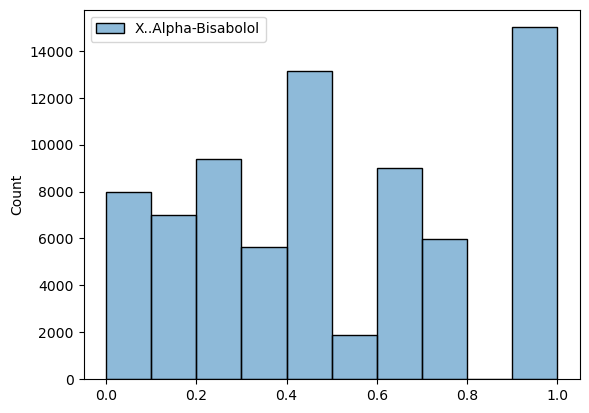

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_85300/350139188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor()

In [10]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_rfreg)

0.028853598705760684

In [12]:
mean_squared_error(y_val, y_pred_rfreg)

0.00570924289145957

In [13]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07555953210191002

In [14]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9866662645019679

In [15]:
#val
r2_score(y_val, y_pred_rfreg)

0.9451741190532014

Residual plots for each target variable

Feature Selection

In [16]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [17]:
df_feat

,features,score
0,tfidf_0,0.000378
1,tfidf_1,0.000592
2,tfidf_2,0.000858
3,tfidf_3,0.002623
4,tfidf_4,0.001961
...,...,...
464,tree,0.000297
465,tropical,0.000289
466,vanilla,0.000507
467,violet,0.000011


In [18]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [19]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
428,cheese,1.206500e-01
389,indica,8.825810e-02
329,tfidf_329,2.140757e-02
253,tfidf_253,2.045904e-02
149,tfidf_149,1.350217e-02
141,tfidf_141,1.272927e-02
426,blueberry,1.229495e-02
168,tfidf_168,1.222049e-02
145,tfidf_145,1.216957e-02
345,tfidf_345,1.190558e-02


In [20]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [21]:
selector.estimator_.feature_importances_

array([3.86046132e-04, 6.29649889e-04, 8.46333926e-04, 2.92470953e-03,
       1.90502583e-03, 1.83140043e-03, 2.15075340e-03, 3.39245374e-03,
       3.00581587e-04, 3.39535567e-04, 2.50082642e-04, 8.52492775e-03,
       2.90055070e-04, 4.37419684e-04, 4.03860310e-04, 9.06450514e-04,
       6.27010941e-04, 9.12290135e-04, 7.39192617e-04, 5.53715723e-04,
       1.50441915e-03, 3.26671427e-03, 1.21183238e-03, 2.87122211e-04,
       5.35906748e-04, 2.56524027e-04, 1.74222700e-03, 7.49975744e-04,
       5.32039352e-04, 4.02171967e-04, 5.42156111e-03, 1.05125481e-03,
       2.67075833e-03, 6.14621240e-04, 2.98561854e-03, 2.41982624e-03,
       9.24187429e-03, 5.16295258e-03, 3.18799232e-05, 5.78250116e-04,
       2.80060418e-04, 2.91633740e-03, 8.14895399e-04, 4.87284538e-03,
       6.93370678e-04, 2.86838798e-03, 1.77781347e-03, 9.02568255e-04,
       1.21396000e-03, 1.12335307e-04, 5.28956233e-04, 3.31750306e-04,
       1.64415899e-03, 9.55622544e-05, 1.24511758e-03, 3.47081812e-04,
      

In [22]:
selector.threshold_

0.0021321961620469083

In [23]:
mask = selector.get_support()

In [24]:
mask

array([False, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,

In [25]:
selected_features = X.columns[mask]

In [26]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_3,tfidf_6,tfidf_7,tfidf_11,tfidf_21,tfidf_30,tfidf_32,tfidf_34,tfidf_35,tfidf_36,...,citrus,diesel,earthy,grape,lemon,mint,orange,pungent,sweet,woody
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.15591,0.213037,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.0,0.165804,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.184581,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.000000,0.352157,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.000000,0.349629,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.000000,0.349629,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [27]:
import joblib

joblib.dump(selector, "selector_rf_tfidf_albis.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf_albis.pkl")

['selected_X_rf_tfidf_albis.pkl']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [29]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [30]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_85300/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [31]:
mean_absolute_error(y_val, y_pred_rfreg)

0.029096789256998705

In [32]:
mean_squared_error(y_val, y_pred_rfreg)

0.0059199705738168925

In [33]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07694134502214588

In [34]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9820359222364132

In [35]:
#val
r2_score(y_val, y_pred_rfreg)

0.943076098934656

Hyperparameter Tuning

In [36]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [37]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [38]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [39]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [40]:
joblib.dump(rscv, "rscv_rf_tfidf_albis.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params_albis.pkl")

['rscv_rf_tfidf_best_params_albis.pkl']

RF (after Hyperparameter Tuning)

In [41]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_85300/1649723548.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [42]:
mean_absolute_error(y_val, y_pred_rfreg)

0.026701436265517083

In [43]:
mean_squared_error(y_val, y_pred_rfreg)

0.004345295728598879

In [44]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06591885715482998

In [45]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.983818943248044

In [46]:
#val
r2_score(y_val, y_pred_rfreg)

0.9582174976935831

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [47]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [48]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_tfidf_albis.pkl")
joblib.dump(y_test, "y_test_rfreg_tfidf_albis.pkl")

['y_test_rfreg_tfidf_albis.pkl']

In [49]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.027267894319582275

In [50]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.004424302740561241

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.06651543234890112

In [52]:
r2_score(y_test, y_pred_rfreg_test)

0.9581186473350903

Error analysis

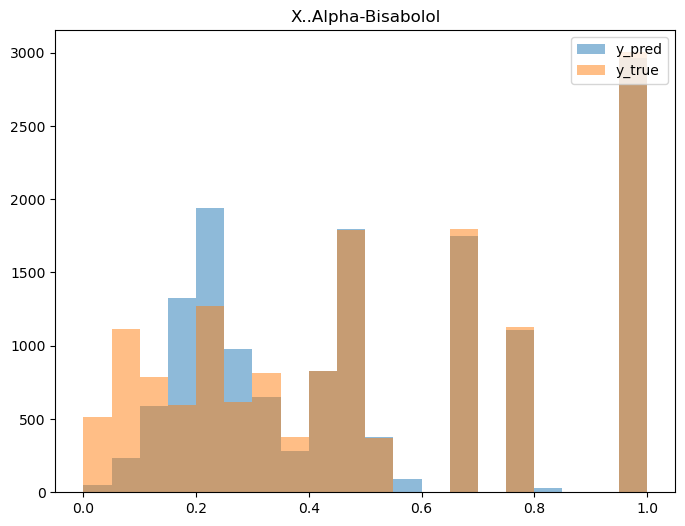

<Figure size 640x480 with 0 Axes>

In [53]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Bisabolol"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_albis.png')

Pearson R

In [54]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.981
P-value: 0.000


<Axes: >

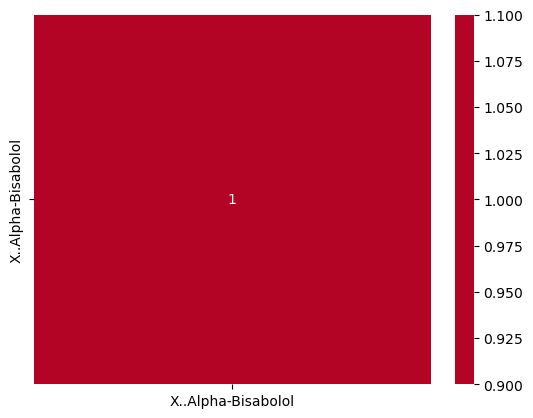

In [55]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)